In [1]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import tweepy #to access the twitter api
import pandas as pd #for basic data operations

# Importing the keys from twitter api
consumerKey = "6Xx7Z3LnGcVR2yT246vh0FX54"
consumerSecret = "NPYutG3hpLSTAxSpCBbJ17Ysu8KKZXGvTQqIj0fPlhUlnId9vX"
accessToken = "2578006729-I42EMRgLnmuDs1cPCcLfJeS3EQ3guyjhFVuR4af"
accessTokenSecret = "0ozPKKjVOfCpY4beXXMomFYz2npQimnbcyhOkfA5bm5bK"

# Establish the connection with twitter API
auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth)
# Search for the Term and define number of tweets 
# searchTerm = input("Enter Keyword/Tag to search about: ")
NoOfTerms = int(input("Enter how many tweets to search: "))
# Get no of tweets and searched term together 


Enter how many tweets to search: 2000


In [3]:
tweets = tweepy.Cursor(api.search,q = 'life' ).items(NoOfTerms)

# or q = 'sponsored' or q =  'advertisement'


In [4]:
json_data = [r._json['text'] for r in tweets]

df = pd.DataFrame(json_data)


In [5]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
from textblob import TextBlob
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [6]:
df.head()

,0
0,RT @__luckyleftie: Men grooming their wives to...
1,RT @keke_raww: sometimes you just have to tell...
2,RT @__luckyleftie: Men grooming their wives to...
3,These cope called for more backup than i’ve ev...
4,"to me, those moments i could have your smiling..."


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       2000 non-null   object
dtypes: object(1)
memory usage: 15.8+ KB


In [8]:
df.isnull().sum()

0    0
dtype: int64

In [9]:
df.columns

RangeIndex(start=0, stop=1, step=1)

In [10]:

df.rename(columns = {0:'text'}, 
            inplace = True)

In [11]:
text_df = df

In [12]:
def data_processing(text):
    text = text.lower()
    text = re.sub(r"https\S+|www\S+https\S+", '',text, flags=re.MULTILINE)
    text = re.sub(r'\@w+|\#','',text)
    text = re.sub(r'[^\w\s]','',text)
    text_tokens = word_tokenize(text)
    filtered_text = [w for w in text_tokens if not w in stop_words]
    return " ".join(filtered_text)

In [13]:
text_df.text = text_df['text'].apply(data_processing)

In [14]:
text_df = text_df.drop_duplicates('text')

In [15]:
stemmer = PorterStemmer()
def stemming(data):
    text = [stemmer.stem(word) for word in data]
    return data

In [16]:
text_df['text'] = text_df['text'].apply(lambda x: stemming(x))

<ipython-input-16-f020c132d43d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_df['text'] = text_df['text'].apply(lambda x: stemming(x))


In [17]:
def polarity(text):
    return TextBlob(text).sentiment.polarity

In [18]:
text_df['polarity'] = text_df['text'].apply(polarity)

<ipython-input-18-ac0dc50b5c9f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_df['polarity'] = text_df['text'].apply(polarity)


In [19]:
text_df.head(10)

,text,polarity
0,rt __luckyleftie men grooming wives modest pre...,-0.300000
1,rt keke_raww sometimes tell people love ill lo...,0.187500
3,cope called backup ive ever seen life like blo...,0.000000
4,moments could smiling face precious times life,0.500000
5,rt hittledaway morning senior delegate cop15 s...,0.200000
6,duty2warn awe finally realizing real life isnt...,0.250000
7,notbadgers official_lfm elio79206073 timrunshi...,0.068182
8,rt ewdatsgross therapist sad imagine alternate...,-0.250000
9,rt prettygisha looking life doctorany one,0.000000
10,rt yearofthepoets ironically life becomes peac...,0.000000


In [20]:
def sentiment(label):
    if label <0:
        return "Negative"
    elif label ==0:
        return "Neutral"
    elif label>0:
        return "Positive"

In [21]:
text_df['sentiment'] = text_df['polarity'].apply(sentiment)

<ipython-input-21-7259a3dad0e5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_df['sentiment'] = text_df['polarity'].apply(sentiment)


In [22]:
text_df.head()

,text,polarity,sentiment
0,rt __luckyleftie men grooming wives modest pre...,-0.3000,Negative
1,rt keke_raww sometimes tell people love ill lo...,0.1875,Positive
3,cope called backup ive ever seen life like blo...,0.0000,Neutral
4,moments could smiling face precious times life,0.5000,Positive
5,rt hittledaway morning senior delegate cop15 s...,0.2000,Positive


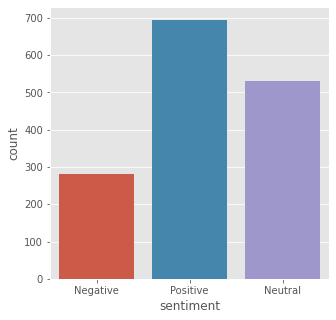

In [23]:
fig = plt.figure(figsize=(5,5))
sns.countplot(x='sentiment', data = text_df)

Text(0.5, 1.0, 'Distribution of sentiments')

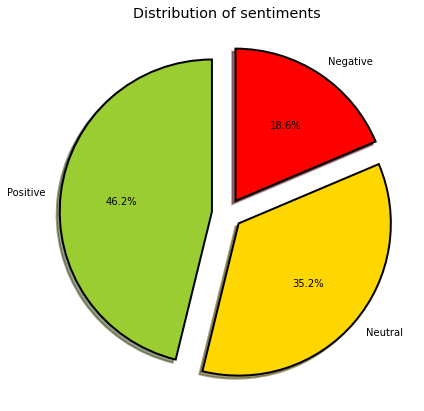

In [24]:
fig = plt.figure(figsize=(7,7))
colors = ("yellowgreen", "gold", "red")
wp = {'linewidth':2, 'edgecolor':"black"}
tags = text_df['sentiment'].value_counts()
explode = (0.1,0.1,0.1)
tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors = colors,
         startangle=90, wedgeprops = wp, explode = explode, label='')
plt.title('Distribution of sentiments')

In [25]:
pos_tweets = text_df[text_df.sentiment == 'Positive']
pos_tweets = pos_tweets.sort_values(['polarity'], ascending= False)
pos_tweets.head()

,text,polarity,sentiment
1594,rt parisrxxx u want best life w aries,1.0,Positive
1379,rt shipwrighta name sword stormwing hes someth...,1.0,Positive
998,rt daily_dabi best day life,1.0,Positive
1714,rt treadperilously december wonderful tread me...,1.0,Positive
1841,snowperson living best life magnificent sculpt...,1.0,Positive


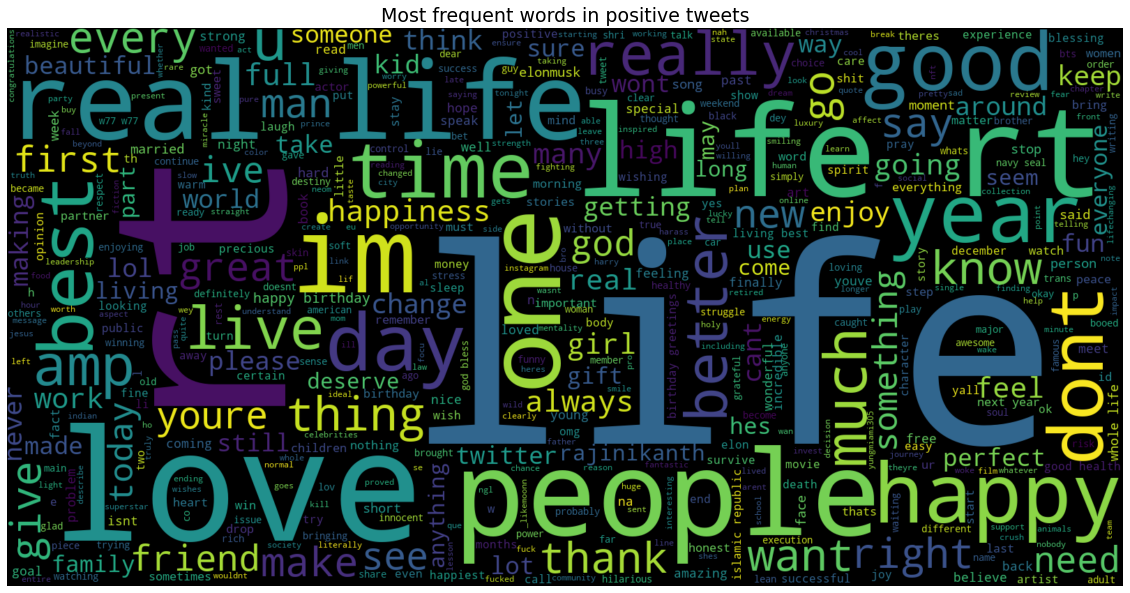

In [26]:
text = ' '.join([word for word in pos_tweets['text']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in positive tweets', fontsize=19)
plt.show()

In [27]:
neg_tweets = text_df[text_df.sentiment == 'Negative']
neg_tweets = neg_tweets.sort_values(['polarity'], ascending= False)
neg_tweets.head()

,text,polarity,sentiment
771,meidastouch life hard faithful domestic terror...,-0.001984,Negative
1152,snygiants playoffs try winning one single game...,-0.005952,Negative
19,rt lops_ug1 stop taking friends silence absenc...,-0.006250,Negative
1495,jayhadhope im worried life doesnt like vacuum ...,-0.008333,Negative
710,samatlounge im going put effort building life ...,-0.012500,Negative


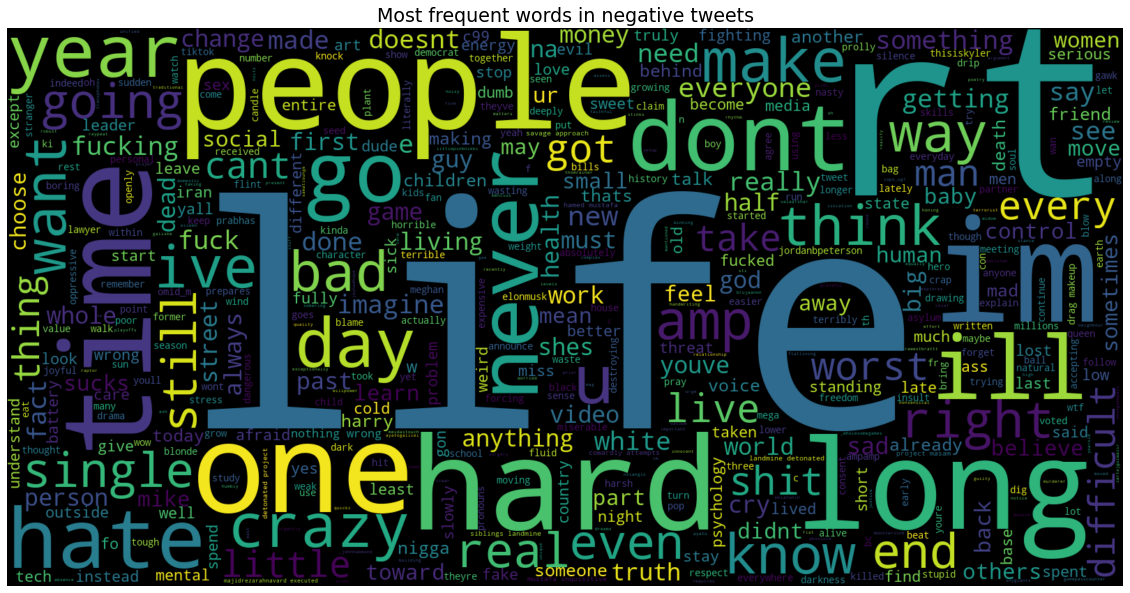

In [28]:
text = ' '.join([word for word in neg_tweets['text']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in negative tweets', fontsize=19)
plt.show()

In [29]:
neutral_tweets = text_df[text_df.sentiment == 'Neutral']
neutral_tweets = neutral_tweets.sort_values(['polarity'], ascending= False)
neutral_tweets.head()

,text,polarity,sentiment
3,cope called backup ive ever seen life like blo...,0.0,Neutral
1273,rt carawil17888192 eu list eu space urgent res...,0.0,Neutral
1338,shitbis world seen ice itll see ice life stay ...,0.0,Neutral
1337,life difficult sometimes make sure hydrate,0.0,Neutral
1333,rt janusfilms photograph yasujirō ozu born day...,0.0,Neutral


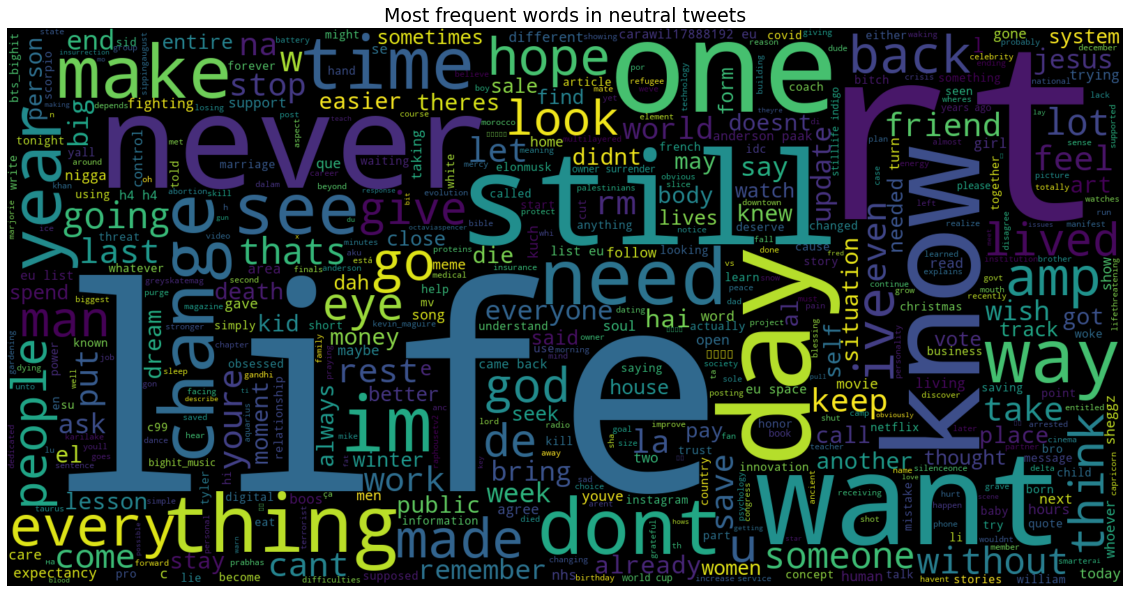

In [30]:
text = ' '.join([word for word in neutral_tweets['text']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in neutral tweets', fontsize=19)
plt.show()

In [31]:
vect = CountVectorizer(ngram_range=(1,2)).fit(text_df['text'])

In [32]:
feature_names = vect.get_feature_names()
print("Number of features: {}\n".format(len(feature_names)))
print("First 20 features:\n {}".format(feature_names[:20]))

Number of features: 20257

First 20 features:
 ['007', '023319while', '023319while life', '023336while', '023336while life', '023347while', '023347while life', '023359while', '023359while life', '023410while', '023410while life', '023427while', '023427while life', '023438while', '023438while life', '023448while', '023448while life', '06shveta', '06shveta pata', '08145979293']


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [33]:
X = text_df['text']
Y = text_df['sentiment']
X = vect.transform(X)

In [34]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [35]:
print("Size of x_train:", (x_train.shape))
print("Size of y_train:", (y_train.shape))
print("Size of x_test:", (x_test.shape))
print("Size of y_test:", (y_test.shape))

Size of x_train: (1202, 20257)
Size of y_train: (1202,)
Size of x_test: (301, 20257)
Size of y_test: (301,)


In [36]:
import warnings
warnings.filterwarnings('ignore')

In [37]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
logreg_pred = logreg.predict(x_test)
logreg_vector = accuracy_score(logreg_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_vector*100))

Test accuracy: 60.80%


In [38]:
print(logreg.predict(vect.transform(["Im good girl"])))

['Positive']


In [39]:
import pickle
pickle.dump(logreg,open('logreg.pkl','wb')) 
pickle.dump(vect, open("vector.pkl", "wb"))
vect_model=pickle.load(open('vector.pkl','rb')) 
pickled_model=pickle.load(open('logreg.pkl','rb')) 

pickled_model.predict(vect_model.transform(["Im good girl"]))

array(['Positive'], dtype=object)

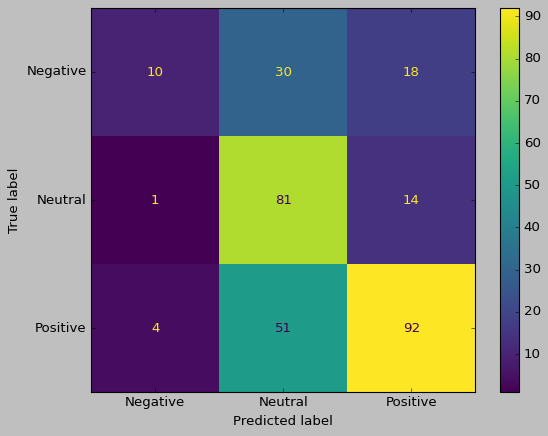

In [40]:
style.use('classic')
cm = confusion_matrix(y_test, logreg_pred, labels=logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=logreg.classes_)
disp.plot()

In [41]:
from sklearn.model_selection import GridSearchCV

In [42]:
param_grid={'C':[0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(LogisticRegression(), param_grid)
grid.fit(x_train, y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10]})

In [43]:
print("Best parameters:", grid.best_params_)

Best parameters: {'C': 10}


In [44]:
y_pred = grid.predict(x_test)

In [45]:
grid_reg_vector = accuracy_score(y_pred, y_test)
print("Test accuracy: {:.2f}%".format(grid_reg_vector*100))

Test accuracy: 62.46%


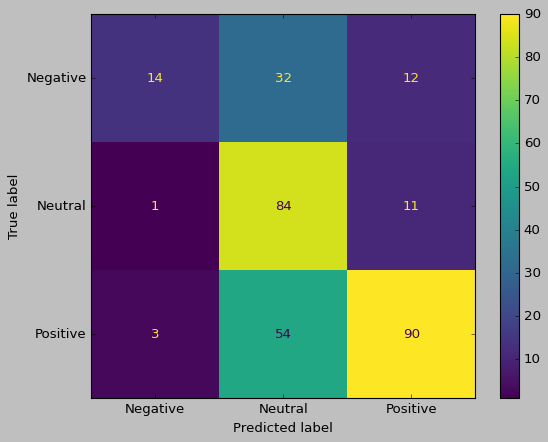

In [46]:

style.use('classic')
cm = confusion_matrix(y_test, y_pred, labels=logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=logreg.classes_)
disp.plot()

In [47]:
from sklearn.svm import LinearSVC

In [48]:
SVCmodel = LinearSVC()
SVCmodel.fit(x_train, y_train)
svc_pred = SVCmodel.predict(x_test)
svc_acc_vector = accuracy_score(svc_pred, y_test)
print("test accuracy: {:.2f}%".format(svc_acc_vector*100))

test accuracy: 63.46%


In [49]:
import pickle
pickle.dump(SVCmodel,open('SVCmodel.pkl','wb')) 
pickle.dump(vect, open("vector.pkl", "wb"))
vect_model=pickle.load(open('vector.pkl','rb')) 
pickled_model=pickle.load(open('SVCmodel.pkl','rb')) 

pickled_model.predict(vect_model.transform(["Im good girl"]))

array(['Positive'], dtype=object)

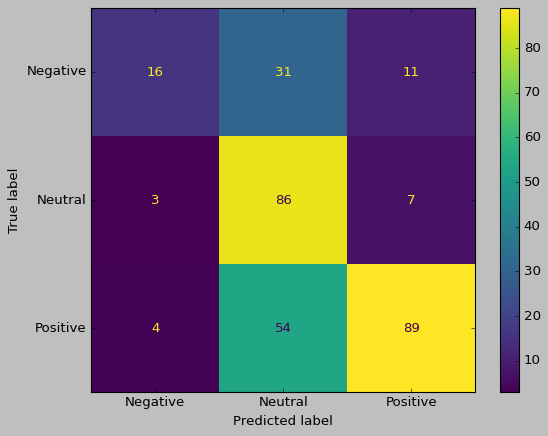

In [50]:

style.use('classic')
cm = confusion_matrix(y_test, svc_pred, labels=SVCmodel.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=SVCmodel.classes_)
disp.plot()

In [51]:
from sklearn.naive_bayes import MultinomialNB

naiveBayesModel = MultinomialNB().fit(x_train, y_train)

naiveBayesScore_vector = naiveBayesModel.score(x_test, y_test)
print (naiveBayesScore_vector*100)

59.136212624584715


In [52]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

In [53]:
training_data, testing_data = train_test_split(text_df, random_state=2000)

Y_train = training_data['sentiment'].values
Y_test = testing_data['sentiment'].values

In [54]:
def extract_features(df, field, training_data, testing_data):
    # TF-IDF BASED FEATURE REPRESENTATION
    tfidf_vectorizer = TfidfVectorizer(use_idf = True, max_df = 0.95)
    tfidf_vectorizer.fit_transform(training_data[field].values.astype('U'))

    train_feature_set = tfidf_vectorizer.transform(training_data[field].values.astype('U'))
    test_feature_set = tfidf_vectorizer.transform(testing_data[field].values.astype('U'))

    return train_feature_set, test_feature_set, tfidf_vectorizer

X_train, X_test, vectorizer = extract_features(
    df, 'text', training_data, testing_data)

In [55]:
from sklearn.linear_model import LogisticRegression

logisticReg = LogisticRegression(
    verbose = 1,
    solver = 'liblinear',
    random_state = 0,
    C = 5,
    penalty = 'l2',
    max_iter = 1000
    )
model = logisticReg.fit(X_train, Y_train)

logreg_tfidf = model.score(X_test, Y_test)
print (logreg_tfidf*100)

[LibLinear]64.62765957446808


In [56]:
from sklearn.naive_bayes import MultinomialNB

naiveBayesModel = MultinomialNB().fit(X_train, Y_train)

naiveBayes_tfidf = naiveBayesModel.score(X_test, Y_test)
print (naiveBayes_tfidf*100)

52.659574468085104


In [57]:
SVCmodel = LinearSVC()
SVCmodel.fit(X_train, Y_train)
svc_pred = SVCmodel.predict(X_test)
svc_acc_tfidf = accuracy_score(svc_pred, Y_test)
print("test accuracy: {:.2f}%".format(svc_acc_tfidf*100))

test accuracy: 66.49%


In [58]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [59]:

from tensorflow.keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.optimizers import RMSprop
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")
     

In [60]:

max_len=50
def tensorflow_based_model(): 
    inputs = Input(name='inputs',shape=[max_len])
    layer = Embedding(2000,50,input_length=max_len)(inputs) 
    layer = LSTM(64)(layer) 
    layer = Dense(256,name='FC1')(layer) 
    layer = Activation('relu')(layer) 
    layer = Dropout(0.5)(layer) 
    layer = Dense(1,name='out_layer')(layer) 
    layer = Activation('sigmoid')(layer) 
    model = Model(inputs=inputs,outputs=layer) 
    return model 

In [61]:
model = tensorflow_based_model() 
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])
     

In [62]:

import joblib
from joblib import dump

    # dump the pipeline model
dump(model, filename="nn.joblib")

['nn.joblib']

In [63]:
target_variable = text_df['sentiment'].apply(lambda x: 0 if x=='Negative' else 1 if x=='Positive' else -1 )

In [64]:
print(text_df)
print(target_variable)

                                                   text  polarity sentiment
0     rt __luckyleftie men grooming wives modest pre...   -0.3000  Negative
1     rt keke_raww sometimes tell people love ill lo...    0.1875  Positive
3     cope called backup ive ever seen life like blo...    0.0000   Neutral
4        moments could smiling face precious times life    0.5000  Positive
5     rt hittledaway morning senior delegate cop15 s...    0.2000  Positive
...                                                 ...       ...       ...
1993  lindyli cry got rid cry babies dead weight suc...   -0.2500  Negative
1994  7 partner system whole life partners crushes w...    0.2000  Positive
1996  path improve worklife balance starts article s...    0.0000   Neutral
1997  meh_body airheadange jordanbpeterson humans li...   -0.0500  Negative
1999  rt avymafia realize life go youll ok without a...    0.5000  Positive

[1503 rows x 3 columns]
0       0
1       1
3      -1
4       1
5       1
       ..
199

In [65]:
X=text_df.text
y=target_variable

In [66]:
max_len = 50
tok = Tokenizer(num_words=2000)
tok.fit_on_texts(X)
sequences = tok.texts_to_sequences(X)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)

In [67]:
sequences_matrix.shape

(1503, 50)

In [68]:
X_train, X_test, Y_train, Y_test = train_test_split(sequences_matrix, y, test_size=0.3, random_state=2)


In [69]:
history=model.fit(X_train,Y_train,batch_size=80,epochs=20)
print('Training finished !!')

Epoch 1/20
14/14 [==============================] - 7s 96ms/step - loss: 0.5895 - accuracy: 0.1930
Epoch 2/20
14/14 [==============================] - 2s 110ms/step - loss: 0.2844 - accuracy: 0.1882
Epoch 3/20
14/14 [==============================] - 2s 109ms/step - loss: 0.1204 - accuracy: 0.1882
Epoch 4/20
14/14 [==============================] - 2s 113ms/step - loss: -0.2706 - accuracy: 0.1911
Epoch 5/20
14/14 [==============================] - 2s 106ms/step - loss: -1.5580 - accuracy: 0.2890
Epoch 6/20
14/14 [==============================] - 1s 101ms/step - loss: -5.4799 - accuracy: 0.3470
Epoch 7/20
14/14 [==============================] - 2s 125ms/step - loss: -14.5020 - accuracy: 0.4297
Epoch 8/20
14/14 [==============================] - 1s 107ms/step - loss: -33.0293 - accuracy: 0.5124
Epoch 9/20
14/14 [==============================] - 1s 87ms/step - loss: -56.1984 - accuracy: 0.5428
Epoch 10/20
14/14 [==============================] - 1s 102ms/step - loss: -84.2278 - accurac

In [70]:
tensorflowacc = model.evaluate(X_test,Y_test)

15/15 [==============================] - 1s 12ms/step - loss: -217.4709 - accuracy: 0.4501


In [71]:
print(tensorflowacc)

[-217.4709014892578, 0.45011085271835327]


Comparing models in terms of their accuracy after applying Vectorization or TFIDF

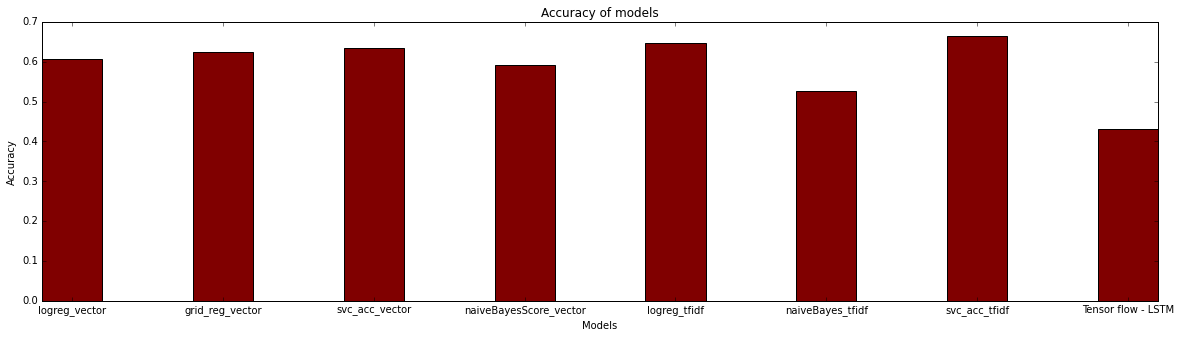

In [73]:

import matplotlib.pyplot as plt
data = {'logreg_vector':logreg_vector, 'grid_reg_vector':grid_reg_vector,'svc_acc_vector':svc_acc_vector,'naiveBayesScore_vector':naiveBayesScore_vector,'logreg_tfidf':logreg_tfidf,'naiveBayes_tfidf':naiveBayes_tfidf,'svc_acc_tfidf':svc_acc_tfidf, 'Tensor flow - LSTM':0.432,
        }
courses = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (20, 5))
 
plt.bar(courses, values, color ='maroon',
        width = 0.4)
 
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Accuracy of models")

plt.savefig("accuracy.pdf")